# Pandas Groupby Implementation

# Student Behavioral Dataset

About Dataset

Student Performance & Behavior Dataset

* This dataset is real data of 5,000 records collected from a private learning provider.
* The dataset includes key attributes necessary for exploring patterns, correlations, and insights related to academic performance.

Columns:

* Student_ID: Unique identifier for each student.
* First_Name: Student’s first name.
* Last_Name: Student’s last name.
* Email: Contact email (can be anonymized).
* Gender: Male, Female, Other.
* Age: The age of the student.
* Department: Student's department (e.g., CS, Engineering, Business).
* Attendance (%): Attendance percentage (0-100%).
* Midterm_Score: Midterm exam score (out of 100).
* Final_Score: Final exam score (out of 100).
* Assignments_Avg: Average score of all assignments (out of 100).
* Quizzes_Avg: Average quiz scores (out of 100).
* Participation_Score: Score based on class participation (0-10).
* Projects_Score: Project evaluation score (out of 100).
* Total_Score: Weighted sum of all grades.
* Grade: Letter grade (A, B, C, D, F).
* Study_Hours_per_Week: Average study hours per week.
* Extracurricular_Activities: Whether the student participates in extracurriculars (Yes/No).
* Internet_Access_at_Home: Does the student have access to the internet at home? (Yes/No).
* Parent_Education_Level: Highest education level of parents (None, High School, Bachelor's, Master's, PhD).
* Family_Income_Level: Low, Medium, High.
* Stress_Level (1-10): Self-reported stress level (1: Low, 10: High).
* Sleep_Hours_per_Night: Average hours of sleep per night.

The Attendance is not part of the Total_Score or has very minimal weight.

Calculating the weighted sum:

Total Score=a⋅Midterm+b⋅Final+c⋅Assignments+d⋅Quizzes+e⋅Participation+f⋅Projects

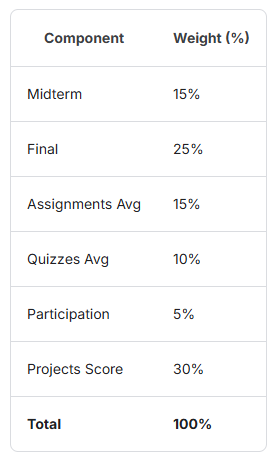

Dataset contains:

* Missing values (nulls): in some records (e.g., Attendance, Assignments, or Parent Education Level).
* Bias in some Datae (ex: grading e.g., students with high attendance get slightly better grades).
* Imbalanced distributions (e.g., some departments having more students).

# 1. Import the dataset

In [99]:
import pandas as pd

student = pd.read_csv('Students Performance Dataset.csv')

In [100]:
student.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,59.8865,F,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,67.7170,D,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.6535,F,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,71.4030,C,13.3,Yes,No,Master's,Medium,6,4.5


In [101]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [102]:
student.shape

(5000, 23)

# 2. Groupby as a method()

syntax :

DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=NoDefault.no_default, observed=False, dropna=True)

Most Common Usage Pattern:

The typical workflow with groupby() involves three steps:

* Splitting: The DataFrame is split into groups based on one or more keys.
* Applying: A function (aggregation, transformation, or filtration) is applied to each group independently.
* Combining: The results of the applied function are combined into a new DataFrame or Series.

Precise Breakdown of Key Parameters:

by (required for most common use cases):

* Single column name (string): df.groupby('ColumnA')
* List of column names (list of strings): df.groupby(['ColumnA', 'ColumnB'])
* A function or dict: To map index or column values to groups.
* Series or array-like: Of the same length as the DataFrame or Series, used as group keys.

axis (default 0):

* 0 or 'index': Group by rows (common).
* 1 or 'columns': Group by columns (less common).

as_index (default True):

* True: Group keys become the index of the result DataFrame.
* False: Group keys remain as columns in the result DataFrame. Often preferred when grouping by multiple columns.

sort (default True):

* True: Sort group keys in ascending order. Set to False for performance if sorting is not needed.

Common Aggregation Methods after groupby():

After calling groupby(), you often chain an aggregation method:

* .sum(): Sum of values in each group.
* .mean(): Mean of values in each group.
* .median(): Median of values in each group.
* .min(): Minimum value in each group.
* .max(): Maximum value in each group.
* .count(): Number of non-null values in each group.
* .size(): Number of rows in each group (including nulls).
* .std(): Standard deviation of values in each group.
* .var(): Variance of values in each group.
* .first(): First non-null value in each group.
* .last(): Last non-null value in each group.
* .agg(): To apply multiple aggregation functions or custom functions.

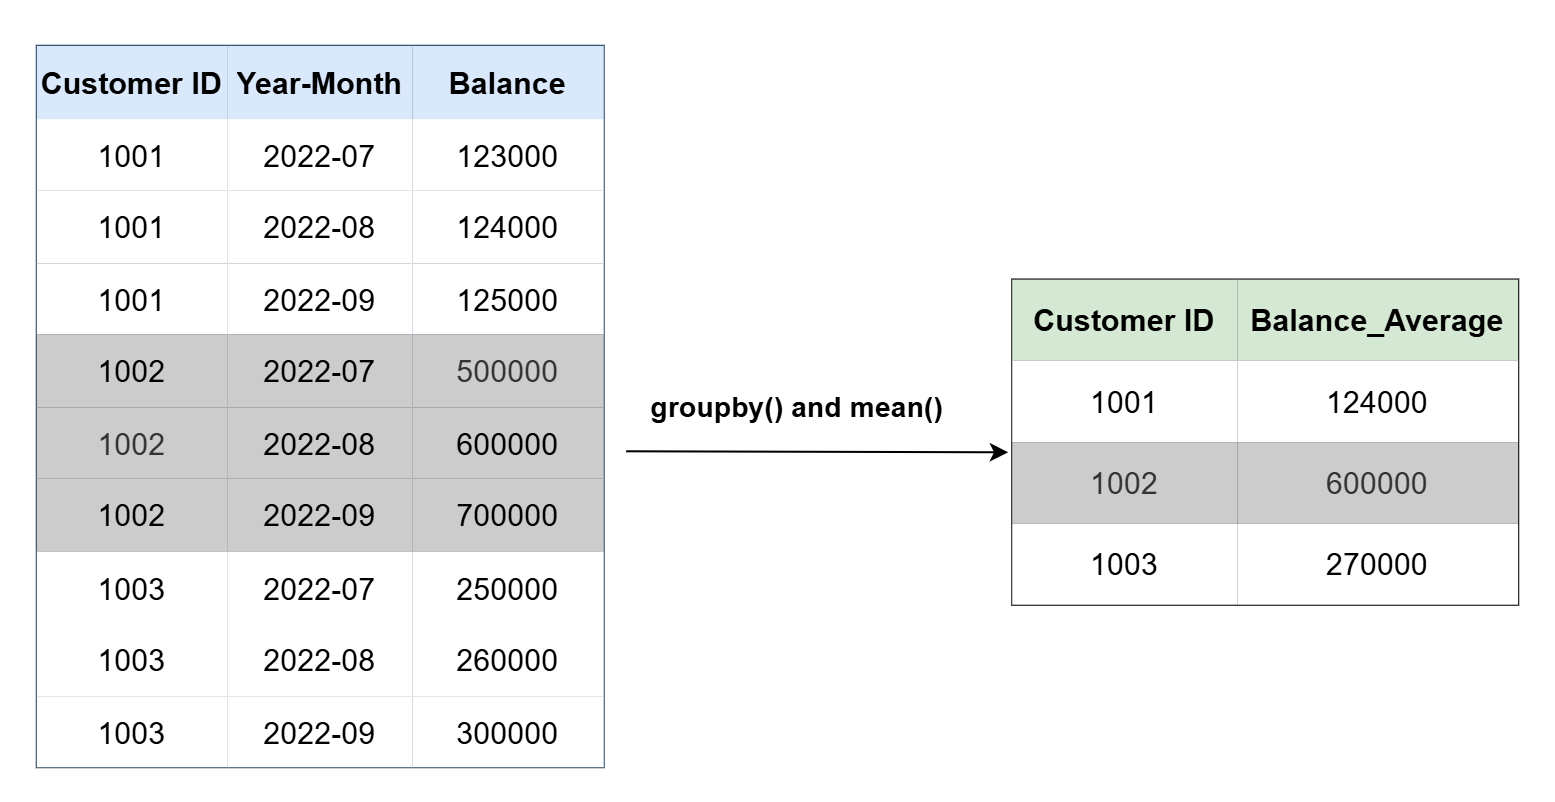

# 2. Data insights leveraging Groupby

* What is the average Midterm_Score per Department?
* What is the distribution of Gender within each Department?
* What is the average Total_Score for each Grade?
* How many students are there in each Department?
* What is the average Study_Hours_per_Week for students with different Parent_Education_Levels?
* What are the minimum and maximum Final_Scores within each Gender?
* What is the average Participation_Score for students based on their Extracurricular_Activities (Yes/No)?
* What is the average Stress_Level for each Family_Income_Level?
* What is the average Sleep_Hours_per_Night for each Grade?
* What is the average Attendance (%) for students with and without Internet_Access_at_Home?
* What is the average Assignments_Avg and Quizzes_Avg for each Department?
* What is the average Total_Score for students with different Stress_Levels?
* What are the average Midterm_Score and Final_Score for students grouped by Parent_Education_Level?
* How many students in each Department have Internet_Access_at_Home (Yes/No)?
* What is the average Projects_Score for students who participate in Extracurricular_Activities versus those who don't?
* What is the average Age of students in each Department?
* What is the standard deviation of Total_Score within each Department?
* What is the average Total_Score for students grouped by Sleep_Hours_per_Night?
* What is the highest Total_Score achieved within each Department?

### A. What is the average Midterm_Score per Department?

In [103]:
# Group by 'Department' and calculate the mean of 'Midterm_Score'

average_midterm_score_per_department = student.groupby('Department')['Midterm_Score'].mean()

average_midterm_score_per_department

,Midterm_Score
Department,
Business,70.661551
CS,70.208378
Engineering,70.843124
Mathematics,71.096566


### B. What is the distribution of Gender within each Department?

In [104]:
# Group by 'Department' and then 'Gender', then count the occurrences in each subgroup
# Using .size() to get the count of rows in each group
# Method 1

gender_distribution_per_department = student.groupby(['Department', 'Gender']).size()

gender_distribution_per_department

Department   Gender
Business     Female    634
             Male      630
CS           Female    599
             Male      640
Engineering  Female    587
             Male      687
Mathematics  Female    629
             Male      594
dtype: int64

In [105]:
# Group by 'Department' and then 'Gender', then count the occurrences in each subgroup
# Using .size() to get the count of rows in each group, then .unstack() to pivot Gender to columns
# Method 2

gender_distribution_per_department = student.groupby(['Department', 'Gender']).size().unstack(fill_value=0)

gender_distribution_per_department

Gender,Female,Male
Department,,
Business,634,630
CS,599,640
Engineering,587,687
Mathematics,629,594


### C. What is the average Total_Score for each Grade?

In [106]:
# Group by 'Grade' and calculate the mean of 'Total_Score'
average_total_score_per_grade = student.groupby('Grade')['Total_Score'].mean()

average_total_score_per_grade

,Total_Score
Grade,
A,91.277375
B,83.127444
C,74.515495
D,65.795618
F,57.552701


### D. How many students are there in each Department?

In [107]:
# Group by 'Department' and count the number of students (rows) in each department
# .size() is precise for counting rows in each group

number_of_students_per_department = student.groupby('Department').size()

number_of_students_per_department

,0
Department,
Business,1264
CS,1239
Engineering,1274
Mathematics,1223


### E. What is the average Study_Hours_per_Week for students with different Parent_Education_Levels?

In [108]:
# Group by 'Parent_Education_Level' and calculate the mean of 'Study_Hours_per_Week'
average_study_hours_by_parent_education = student.groupby('Parent_Education_Level')['Study_Hours_per_Week'].mean()


average_study_hours_by_parent_education

,Study_Hours_per_Week
Parent_Education_Level,
Bachelor's,17.786373
High School,17.497243
Master's,17.292600
PhD,17.691107


In [109]:
student.isnull().sum()

,0
Student_ID,0
First_Name,0
Last_Name,0
Email,0
Gender,0
Age,0
Department,0
Attendance (%),0
Midterm_Score,0
Final_Score,0


We can see 1025 parents are their for whom Parent_Education_Level is null or nan . So how does pandas groupby() treat null values

* Pandas' groupby() operations only consider non-null values when performing calculations like mean(), sum(), count(), etc..
* Therefore, if there are 1025 parents for whom Parent_Education_Level is not added (meaning they are NaN or None values), those 1025 rows will be excluded from the grouping criterion when you perform df.groupby('Parent_Education_Level'). This means they will not be included in the calculation of the average Study_Hours_per_Week for any of the education level groups.

Impact on the calculation:

The average Study_Hours_per_Week for each Parent_Education_Level will only be calculated based on the students whose Parent_Education_Level is present (i.e., not null). The 1025 rows with missing Parent_Education_Level will simply be ignored for this specific groupby aggregation.

### F. What are the minimum and maximum Final_Scores within each Gender?

In [110]:
# Group by 'Gender' and calculate the minimum and maximum of 'Final_Score'

min_max_final_score_by_gender = student.groupby('Gender')['Final_Score'].agg(['min', 'max'])

min_max_final_score_by_gender

,min,max
Gender,,
Female,40.01,99.97
Male,40.01,99.98


### G. What is the average Participation_Score for students based on their Extracurricular_Activities (Yes/No)?

In [111]:
# Group by 'Extracurricular_Activities' and calculate the mean of 'Participation_Score'

average_participation_by_extracurriculars = student.groupby('Extracurricular_Activities')['Participation_Score'].mean()

average_participation_by_extracurriculars

,Participation_Score
Extracurricular_Activities,
No,49.696423
Yes,50.228463


### H. What is the average Stress_Level for each Family_Income_Level?

In [112]:
# Group by 'Family_Income_Level' and calculate the mean of 'Stress_Level'

average_stress_level_by_income = student.groupby('Family_Income_Level')['Stress_Level (1-10)'].mean()


average_stress_level_by_income

,Stress_Level (1-10)
Family_Income_Level,
High,5.456986
Low,5.502075
Medium,5.561529


### I. What is the average Sleep_Hours_per_Night for each Grade?

In [113]:
# Group by 'Grade' and calculate the mean of 'Sleep_Hours_per_Night'

average_sleep_hours_by_grade = student.groupby('Grade')['Sleep_Hours_per_Night'].mean()

average_sleep_hours_by_grade

,Sleep_Hours_per_Night
Grade,
A,6.925000
B,6.565047
C,6.514348
D,6.497898
F,6.479928


### J. What is the average Attendance (%) for students with and without Internet_Access_at_Home?

In [114]:
# Group by 'Internet_Access_at_Home' and calculate the mean of 'Attendance (%)'

average_attendance_by_internet_access = student.groupby('Internet_Access_at_Home')['Attendance (%)'].mean()

average_attendance_by_internet_access

,Attendance (%)
Internet_Access_at_Home,
No,75.540423
Yes,75.174655


### K. What is the average Assignments_Avg and Quizzes_Avg for each Department?

In [115]:
# Group by 'Department' and calculate the mean of 'Assignments_Avg' and 'Quizzes_Avg'

average_scores_by_department = student.groupby('Department').agg(
    Average_Assignments_Avg=('Assignments_Avg', 'mean'),
    Average_Quizzes_Avg=('Quizzes_Avg', 'mean')
)

average_scores_by_department

,Average_Assignments_Avg,Average_Quizzes_Avg
Department,,
Business,74.809391,75.875538
CS,75.110032,74.583672
Engineering,75.033689,74.345377
Mathematics,74.871856,74.529199


### L. What is the average Total_Score for students with different Stress_Levels?

In [116]:
# Group by 'Stress_Level' and calculate the mean of 'Total_Score'

average_total_score_by_stress_level = student.groupby('Stress_Level (1-10)')['Total_Score'].mean()

average_total_score_by_stress_level

,Total_Score
Stress_Level (1-10),
1,71.329284
2,71.564632
3,71.768613
4,71.538726
5,71.942466
6,71.465471
7,71.162220
8,72.186396
9,71.963505


### M. What are the average Midterm_Score and Final_Score for students grouped by Parent_Education_Level?

In [117]:
# Group by 'Parent_Education_Level' and calculate the mean of 'Midterm_Score' and 'Final_Score'

average_scores_by_parent_education = student.groupby('Parent_Education_Level').agg(
    Average_Midterm_Score=('Midterm_Score', 'mean'),
    Average_Final_Score=('Final_Score', 'mean')
)

average_scores_by_parent_education

,Average_Midterm_Score,Average_Final_Score
Parent_Education_Level,,
Bachelor's,70.507971,70.415176
High School,70.195048,69.344634
Master's,71.084440,69.487630
PhD,71.013933,69.022075


Impact on the calculation:

The average Study_Hours_per_Week for each Parent_Education_Level will only be calculated based on the students whose Parent_Education_Level is present (i.e., not null). The 1025 rows with missing Parent_Education_Level will simply be ignored for this specific groupby aggregation.

### N. How many students in each Department have Internet_Access_at_Home (Yes/No)?

In [118]:
# Group by 'Department' and 'Internet_Access_at_Home', then count the occurrences
# .size() counts the number of rows in each group
# Method 1


internet_access_by_department = student.groupby(['Department', 'Internet_Access_at_Home']).size()

internet_access_by_department

Department   Internet_Access_at_Home
Business     No                         640
             Yes                        624
CS           No                         605
             Yes                        634
Engineering  No                         629
             Yes                        645
Mathematics  No                         606
             Yes                        617
dtype: int64

In [119]:
# Group by 'Department' and 'Internet_Access_at_Home', then count the occurrences
# .size() counts the number of rows in each group
# .unstack(fill_value=0) pivots the 'Internet_Access_at_Home' categories into columns
# and fills any missing combinations with 0
# Method 2

internet_access_by_department = student.groupby(['Department', 'Internet_Access_at_Home']).size().unstack(fill_value=0)

internet_access_by_department

Internet_Access_at_Home,No,Yes
Department,,
Business,640,624
CS,605,634
Engineering,629,645
Mathematics,606,617


### O. What is the average Projects_Score for students who participate in Extracurricular_Activities versus those who don't?

In [120]:
# Group by 'Extracurricular_Activities' and calculate the mean of 'Projects_Score'

average_projects_score_by_extracurriculars = student.groupby('Extracurricular_Activities')['Projects_Score'].mean()

average_projects_score_by_extracurriculars

,Projects_Score
Extracurricular_Activities,
No,74.829538
Yes,74.737006


### P. What is the average Age of students in each Department?

In [121]:
# Group by 'Department' and calculate the mean of 'Age'
average_age_by_department = student.groupby('Department')['Age'].mean()

average_age_by_department

,Age
Department,
Business,21.104430
CS,21.015335
Engineering,21.035322
Mathematics,21.037612


### Q. What is the standard deviation of Total_Score within each Department?

In [122]:
# Group by 'Department' and calculate the standard deviation of 'Total_Score'

std_dev_total_score_by_department = student.groupby('Department')['Total_Score'].std()

std_dev_total_score_by_department

,Total_Score
Department,
Business,7.288742
CS,7.045937
Engineering,7.269996
Mathematics,7.310843


### R. What is the average Total_Score for students grouped by Sleep_Hours_per_Night?

In [123]:
# Group by 'Sleep_Hours_per_Night' and calculate the mean of 'Total_Score'

average_total_score_by_sleep_hours = student.groupby('Sleep_Hours_per_Night')['Total_Score'].mean()

average_total_score_by_sleep_hours

,Total_Score
Sleep_Hours_per_Night,
4.0,70.605887
4.1,72.974064
4.2,71.250489
4.3,70.352583
4.4,71.824810
4.5,72.129961
4.6,71.123138
4.7,70.752031
4.8,71.252663


### S. What is the highest Total_Score achieved within each Department?

In [124]:
# Group by 'Department' and calculate the maximum of 'Total_Score'

highest_total_score_by_department = student.groupby('Department')['Total_Score'].max()

highest_total_score_by_department

,Total_Score
Department,
Business,93.3160
CS,95.0915
Engineering,92.6520
Mathematics,91.8410


# COMPLETED